In [1]:
%matplotlib inline
#주피터노트북에서 라인 아래에 보여지도록 설정

%config InlineBackend.figure_formats = {'png','retina'} 
#png 이미지 압축기술설정, retina 그래프 해상도 2배 높히기

#그래프 한글폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
#음수처리
mpl.rcParams['axes.unicode_minus'] = False

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:
# 스케일링--------------------

from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale

x = (np.arange(9, dtype=np.float) - 3).reshape(-1, 1)
x = np.vstack([x, [20]])  # outlier
df = pd.DataFrame(np.hstack([x, scale(x), robust_scale(x), minmax_scale(x), maxabs_scale(x)]), 
                  columns=["x", "scale(x)", "robust_scale(x)", "minmax_scale(x)", "maxabs_scale(x)"])
df

#근데 사실 이 함수를 안쓰고 클래스를 쓴다. -- CV할때 사용할수가 없다. 그래서 객체에 저장하는 방법을 사용하는데.... 

,x,scale(x),robust_scale(x),minmax_scale(x),maxabs_scale(x)
0,-3.0,-0.950995,-1.000000,0.000000,-0.15
1,-2.0,-0.789809,-0.777778,0.043478,-0.10
2,-1.0,-0.628624,-0.555556,0.086957,-0.05
3,0.0,-0.467438,-0.333333,0.130435,0.00
4,1.0,-0.306253,-0.111111,0.173913,0.05
5,2.0,-0.145067,0.111111,0.217391,0.10
6,3.0,0.016119,0.333333,0.260870,0.15
7,4.0,0.177304,0.555556,0.304348,0.20
8,5.0,0.338490,0.777778,0.347826,0.25
9,20.0,2.756273,4.111111,1.000000,1.00


In [8]:
from sklearn.datasets import load_iris
iris = load_iris()

data1 = iris.data
data2 = scale(iris.data)

print("old mean:", np.mean(data1, axis=0))
print("old std: ", np.std(data1, axis=0))
print("new mean:", np.mean(data2, axis=0))
print("new std: ", np.std(data2, axis=0))


# 알으로 스케일링은 아래의것을 쓰도록 한다.==================================

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # scaler가 스케일링을 해줌
scaler.fit(data1)
data2 = scaler.transform(data1) #<--- test파일로 CV할때는 여기에만 test파일쓰고 위에꺼는 train꺼만~

data1.std(), data2.std()
#--- 이렇게 하는 이유는 CV때문임--- 사실 from_formula로 스케일링했으면 지가알아서 다 하고있다.

old mean: [ 5.84333333  3.054       3.75866667  1.19866667]
old std:  [ 0.82530129  0.43214658  1.75852918  0.76061262]
new mean: [ -1.69031455e-15  -1.63702385e-15  -1.48251781e-15  -1.62314606e-15]
new std:  [ 1.  1.  1.  1.]


(1.974000985027335, 1.0)

In [11]:
# 정규화-----------------------------(개별 데이터의 상대적 크기가 중요할때)

from sklearn.preprocessing import normalize

x = np.vstack([np.arange(5, dtype=float) - 20, np.arange(5, dtype=float) - 2]).T
y1 = scale(x)
y2 = normalize(x)

print("original x:\n", x)
print("scale:\n", y1)
print("norms (scale)\n", np.linalg.norm(y1, axis=1))
print("normlize:\n", y2)
print("norms (normalize)\n", np.linalg.norm(y2, axis=1))

from sklearn.datasets import load_iris
iris = load_iris()

data1 = iris.data[:,:2]
data3 = normalize(data1)

original x:
 [[-20.  -2.]
 [-19.  -1.]
 [-18.   0.]
 [-17.   1.]
 [-16.   2.]]
scale:
 [[-1.41421356 -1.41421356]
 [-0.70710678 -0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]
 [ 1.41421356  1.41421356]]
norms (scale)
 [ 2.  1.  0.  1.  2.]
normlize:
 [[-0.99503719 -0.09950372]
 [-0.99861783 -0.05255883]
 [-1.          0.        ]
 [-0.99827437  0.05872202]
 [-0.99227788  0.12403473]]
norms (normalize)
 [ 1.  1.  1.  1.  1.]


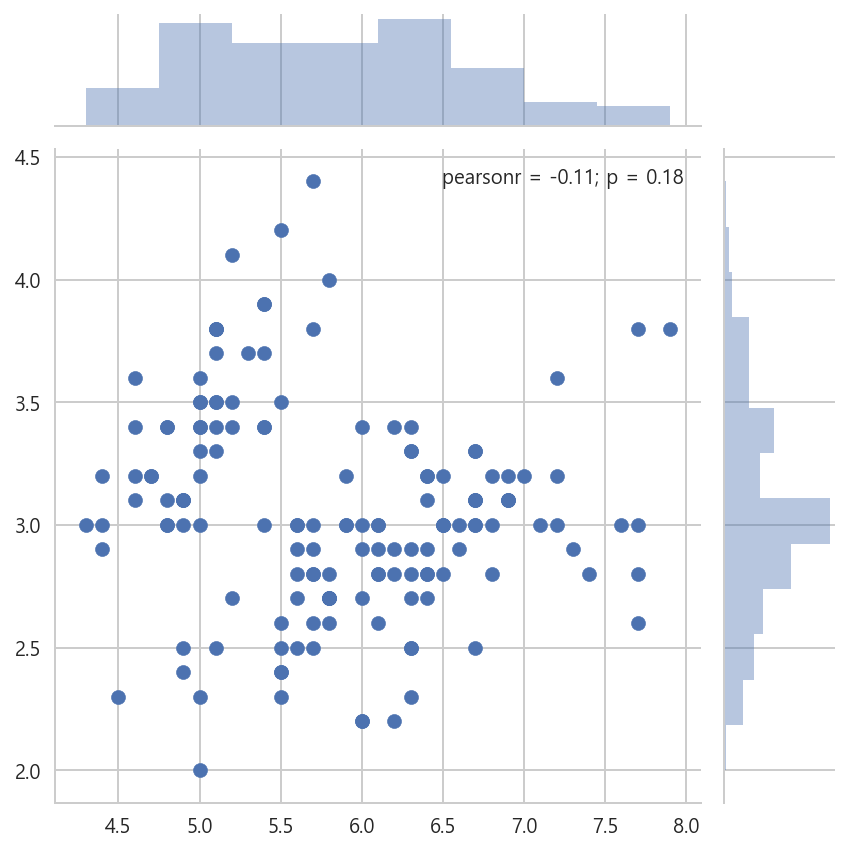

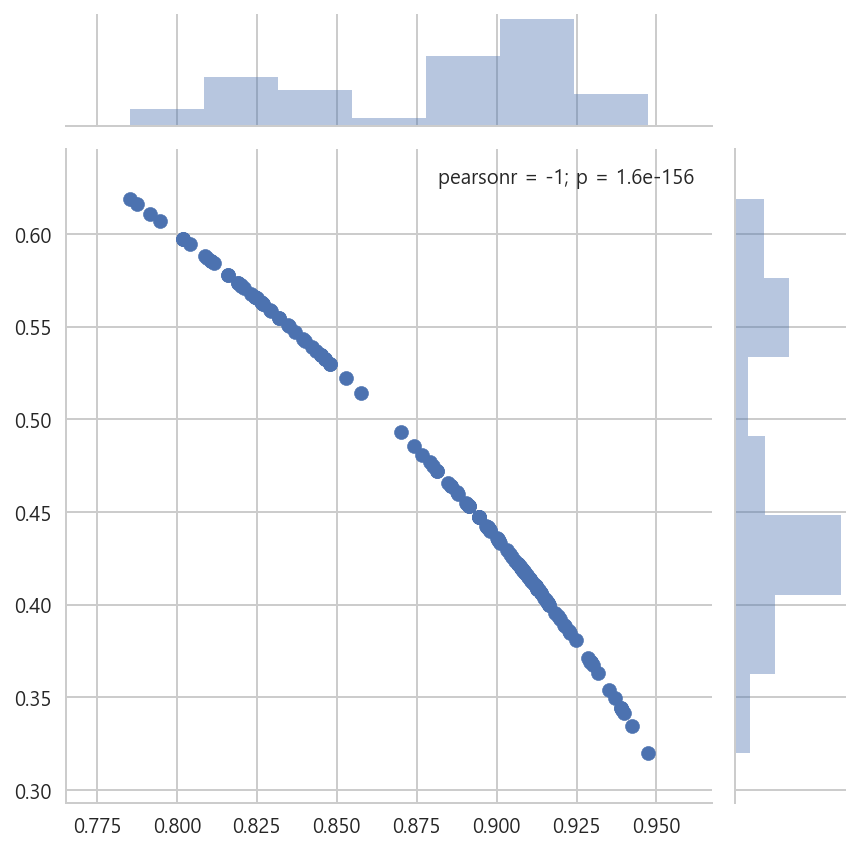

In [12]:
sns.jointplot(data1[:,0], data1[:,1])
sns.jointplot(data3[:,0], data3[:,1])
plt.show()

In [13]:
# One-Hot-Encoder

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

X = np.array([[0], [1], [2]])
X

array([[0],
       [1],
       [2]])

In [14]:
ohe.fit(X)
ohe.n_values_, ohe.feature_indices_, ohe.active_features_


(array([3]), array([0, 3], dtype=int32), array([0, 1, 2], dtype=int64))

In [15]:
ohe.transform(X).toarray()


array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [16]:
X = np.array([[0, 0, 4], [1, 1, 0], [0, 2, 1], [1, 0, 2]]) 
X


array([[0, 0, 4],
       [1, 1, 0],
       [0, 2, 1],
       [1, 0, 2]])

In [18]:
ohe.fit(X)
ohe.n_values_, ohe.feature_indices_, ohe.active_features_


(array([2, 3, 5]),
 array([ 0,  2,  5, 10], dtype=int32),
 array([0, 1, 2, 3, 4, 5, 6, 7, 9], dtype=int64))

In [19]:
ohe.transform(X).toarray()


array([[ 1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.],
       [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.]])

In [20]:
ohe = OneHotEncoder(categorical_features=[False, True, False])
ohe.fit_transform(X).toarray()


array([[ 1.,  0.,  0.,  0.,  4.],
       [ 0.,  1.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  1.],
       [ 1.,  0.,  0.,  1.,  2.]])

In [22]:
ohe.n_values_, ohe.feature_indices_, ohe.active_features_


(array([3]), array([0, 3], dtype=int32), array([0, 1, 2], dtype=int64))

In [23]:
# 여기부터는 링크참조해라-----------------------------------------------------------------------
# https://datascienceschool.net/view-notebook/f43be7d6515b48c0beb909826993c856/



# Imputer ---- 누락된데이터 채운다 (으악!!!)

In [24]:
# Binarizer ---- 기준값을 가지고 크고 작은걸 판단하여 결과를 0,1로 구분한다.

In [ ]:
# Polynomial Features ----- 알아서 제곱,세제곰,네제곱,X1X2 등의 컬럼을 만들고자 하면 사용한다. 

In [25]:
# Function Transformer ----- 위의것 말고 다른 함수의 결과값으로 만들고자 하는 경우

In [26]:
# Lable Encoder ---- 라벨링 알아서 해준다, 반대로도 바꿀 수 있다

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = ['A', 'B', 'A', 'A', 'B', 'C', 'C', 'A', 'C', 'B']
le.fit(y)
le.classes_


array(['A', 'B', 'C'],
      dtype='<U1')

In [27]:
y2 = le.transform(y) 
y2


array([0, 1, 0, 0, 1, 2, 2, 0, 2, 1], dtype=int64)

In [28]:
le.inverse_transform(y2) # 이게 반대로 바꿔주는 함수

array(['A', 'B', 'A', 'A', 'B', 'C', 'C', 'A', 'C', 'B'],
      dtype='<U1')

In [29]:
# Label Binarizer ----이름이 좀 이상한데...어쨌든 Y값을 One-Hot-Encoding 해주는 존재임... 곧 쓸꺼야

from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y = ['A', 'B', 'A', 'A', 'B', 'C', 'C', 'A', 'C', 'B']
lb.fit(y)


LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [30]:
lb.classes_


array(['A', 'B', 'C'],
      dtype='<U1')

In [31]:
y2 = lb.transform(y)
y2


array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0]])

In [32]:
lb.inverse_transform(y2)


array(['A', 'B', 'A', 'A', 'B', 'C', 'C', 'A', 'C', 'B'],
      dtype='<U1')